## Comparison between correlated and uncorrelated variables using Monte Carlo

#### By Irene Virdis

### case 2: different input distributions

In this notebook we want to compare Monte Carlo's estimates testing different input distributions for two cases: independent and correlated input random variables.
The Gaussian distribution will be tested for the 20 different couples of mean and variance.
The choosen blackbox is linear and it has been declared as reported in the following lines:

In [24]:
%matplotlib notebook
from equadratures import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

from matplotlib.ticker import NullFormatter

#--------------------------- input distributions parameters -----------------#

mu1 = np.linspace(-3.0, 1.0, 20) # mean 1
mu2 = np.linspace(-2.0 ,4.0, 20) # mean 2

sigma1_quad = np.linspace(1.0, 2.0, 20) # variance 1
sigma2_quad = np.linspace(0.5, 0.8, 20) # variance 2

dev_1 = np.sqrt(sigma1_quad) # standard deviation 1
dev_2 = np.sqrt(sigma2_quad) # standard deviation 2

l      = len(mu1)

#-------------------------- coefficients -----------------------------------#
a = 3.0
b = 5.0

def blackbox(x):
    return a*x[0] + b*x[1]

integer = np.zeros((l,1))


### Comparison between correlated and uncorrelated variables using Monte Carlo

In this section will be exposed the differences between mean and variance Monte Carlo's prediction by varying the parameters of input distributions. 
In the first case under study $X$ and $Y$ are supposed to be independent and the output distribution is built with a $reshape$ function which models through a linear relationship. 

In [8]:
#----------------------------- monte carlo mean and variance -----------#
#   INDEPENDENT VARIABLES
N = 900000

x = np.random.randn(N,2)
x1 = np.zeros((N,1))
x2 = np.zeros((N,1))
zi = np.zeros((N,1))

results_ind_m = np.zeros((l,1))
results_ind_v = np.zeros((l,1))

print 'INDEPENDENT VARIABLES'
# np.random.normal sintax:
# (loc, scale, size) ---> loc= centre, scale= std deviation, size= OPTIONAL
for i in range(0,20):
    
    x1 = x[:,0]*dev_1[i] + mu1[i]
    x2 = x[:,1]*dev_2[i] + mu2[i]

    zi = evalfunction(np.reshape([x1,x2],(N,2)),blackbox)
    results_ind_m[i]  = np.mean(zi)
    results_ind_v[i]  = np.var(zi)
    
    integer[i] = i
    
    print 'mean:' , np.mean(zi), 'variance:' , np.var(zi), 'skewness:', skew(zi)




INDEPENDENT VARIABLES
mean: -19.99372723417164 variance: 41.502917611348835 skewness: [-0.37947551]
mean: -17.888337576382504 variance: 46.21225379049705 skewness: [-0.38349345]
mean: -15.782950516729237 variance: 51.27614299244874 skewness: [-0.38419972]
mean: -13.677565893898356 variance: 56.694586614591834 skewness: [-0.38240813]
mean: -11.572183563198129 variance: 62.46758589010186 skewness: [-0.37876243]
mean: -9.466803394195573 variance: 68.5951419129623 skewness: [-0.37376522]
mean: -7.3614252687757045 variance: 75.07725565836004 skewness: [-0.36780535]
mean: -5.256049079533582 variance: 81.91392799945163 skewness: [-0.36118153]
mean: -3.1506747284309857 variance: 89.10515972125324 skewness: [-0.35412197]
mean: -1.0453021256658193 variance: 96.65095153223052 skewness: [-0.34680008]
mean: 1.0600688112859653 variance: 104.55130407403199 skewness: [-0.33934688]
mean: 3.165438158487531 variance: 112.80621792971581 skewness: [-0.3318607]
mean: 5.270805986242138 variance: 121.41569363

The analogous procedure has been followed to determinate mean and variance values with correlated variables: the relationship can be declared by using the $Numpy$ function $random.multivariate_normal$ which receives the mean array and the covariance matrix as arguements. These two parameters can be defined as follows:

- mean array : for the case under study it has (2x1) dimension and contains $\mu_i$, the mean of each distribution $X_i$.

- covariance matrix: it is defined as follows: 
 $cov(X,Y) = 
  \left[ {\begin{array}{ccc}
   {\sigma_1}^2 &  ... &{\sigma_1}{\sigma_{2}} \\
   ... &  ... & ... \\
   {\sigma_{2}}{\sigma_1} & ... & {\sigma_{2}}^2 \\
  \end{array} } \right]$
  
 is a matrix of (2x2) elements, positive and simmetric. Along the principal diagonal have  been reported the squared values of standard deviations ${\sigma_{ij}}^2$ for $i=j$. 

In [9]:
mean_a = np.zeros((2,1))
zi     = np.zeros((N,1))
cov    = []

results_corr_m = np.zeros((l,1))
results_corr_v = np.zeros((l,1))

print 'CORRELATED VARIABLES:'
for i in range(0,20):
    mean_a = [mu1[i], mu2[i]]
    cov = [[sigma1_quad[i]**2,  sigma2_quad[i]*sigma1_quad[i]],[sigma2_quad[i]*sigma1_quad[i], sigma1_quad[i]**2]]

    xc,yc = np.random.multivariate_normal(mean_a, cov,(N,1)).T
      
    zi = evalfunction(np.reshape([xc,yc],(N,2)),blackbox)
    results_corr_m[i] = np.mean(zi)
    results_corr_v[i] = np.var(zi)
    print 'mean:' , np.mean(zi), 'variance:' , np.var(zi), 'skewness:', skew(zi)

CORRELATED VARIABLES:
mean: -20.00619960318379 variance: 49.9415707543978 skewness: [-0.00156053]
mean: -17.898066018195856 variance: 57.246356352019276 skewness: [0.00128244]
mean: -15.79199340530158 variance: 65.116741126876 skewness: [-0.00348656]
mean: -13.682817657890874 variance: 73.13594453427741 skewness: [-0.00254902]
mean: -11.587162775646647 variance: 82.05341932634359 skewness: [0.00128535]
mean: -9.484723637884933 variance: 91.62757199025488 skewness: [0.00136634]
mean: -7.350052020867006 variance: 101.18769578355204 skewness: [0.00265931]
mean: -5.258264880936831 variance: 111.80148628323654 skewness: [-0.00156262]
mean: -3.166095166745373 variance: 122.85695466380339 skewness: [0.00384702]
mean: -1.0682488915059496 variance: 134.4444303905318 skewness: [0.00157246]
mean: 1.0340694315755015 variance: 146.62296462845853 skewness: [-0.00177887]
mean: 3.161634771765019 variance: 159.10499193667422 skewness: [-0.00191585]
mean: 5.248031649947479 variance: 172.26718532654567 s

A graphic comparison between the cases under study has been reported below: the values of $\mu$ and $\sigma^2$ has been plotted as functions of the integer array containing the indexes of the iterations: it is representative of the 20 couples of $(\mu, \sigma^2)$ used for the for the tests.


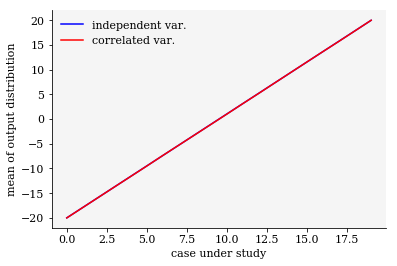

In [11]:
plt.figure()
plt.grid()
plt.plot( integer, results_ind_m, 'b-', label= 'independent var.')
plt.plot( integer,results_corr_m, 'r-', label='correlated var.')
plt.xlabel('case under study')
plt.ylabel('mean of output distribution')
plt.legend(loc='upper left')
plt.show()


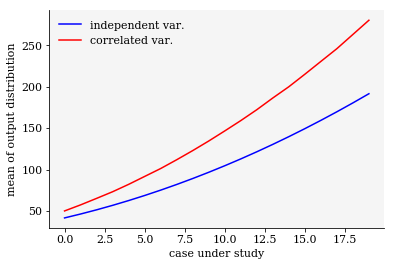

In [12]:
plt.figure()
plt.grid()
plt.plot( integer,results_ind_v, 'b-', label= 'independent var.')
plt.plot( integer, results_corr_v, 'r-', label='correlated var.')
plt.xlabel('case under study')
plt.ylabel('mean of output distribution')
plt.legend(loc='upper left')
plt.show()

The plot of the different multivariate gaussian distributions has been reported in the picture below: they have been calculated by varying the 20 couple of $([\mu_{i} \mu_{j}]. 

<IPython.core.display.Javascript object>


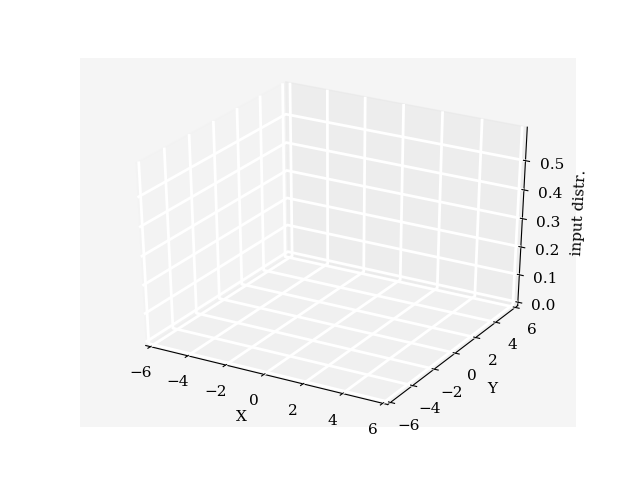

In [27]:
N = 250

fig = plt.figure(1)
ax = plt.axes(projection = '3d')
ax.set_zlim3d(0,0.6)   
ax.set_xlim3d(-6,6)   
ax.set_ylim3d(-6,6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('input distr.')

#print 'INDEPENDENT VARIABLES'
# np.random.normal sintax:
# (loc, scale, size) ---> loc= centre, scale= std deviation, size= OPTIONAL
for i in range(0,20):
    
    ax.text(0.5, 5, 0.6, 'correlated', color='red')
    ax.text(0.5, 3, 0.6, 'independent', color='blue')
    x = np.random.randn(N,2)
    x1 = x[:,0]*dev_1[i] + mu1[i]
    x2 = x[:,1]*dev_2[i] + mu2[i]
    z = x[:,0]*0
    plane = x[:,0]*0 +6
    xp = (1.0/(dev_1[i]*np.sqrt(2.0*3.14)))*(np.exp((-(x1-mu1[i])**2)/(2*sigma1_quad[i])))
    yp = (1.0/(dev_2[i]*np.sqrt(2.0*3.14)))*(np.exp((-(x2-mu2[i])**2)/(2*sigma2_quad[i])))
    mean_a = [mu1[i], mu2[i]]
    cov = [[sigma1_quad[i]**2, sigma1_quad[i]*sigma2_quad[i]], [sigma1_quad[i]*sigma2_quad[i], sigma2_quad[i]**2]]
    xc, yc = np.random.multivariate_normal(mean_a, cov, (N,1)).T
    xcp = (1.0/(dev_1[i]*np.sqrt(2.0*3.14)))*(np.exp((-(xc-mu1[i])**2)/(2*sigma1_quad[i])))
    ycp = (1.0/(dev_2[i]*np.sqrt(2.0*3.14)))*(np.exp((-(yc-mu2[i])**2)/(2*sigma2_quad[i])))
    
    xc = xc[0]
    yc = yc[0]
    xcp = xcp[0]
    ycp = ycp[0]
    # correlated multivariate distribution
    ax.scatter3D(xc, yc, z, c=z, cmap='gist_rainbow');
    # independent mult. distr.
    ax.scatter3D(x1, x2, z, c=z, cmap='bwr'); 
    # input distributions:
    # independent
    ax.plot3D(x1, plane , xp, 'b.')
    ax.plot3D(-plane ,x2, yp, 'b.')
    # correlated
    ax.plot3D(xc, plane , xcp, 'r.')
    ax.plot3D(-plane ,yc, ycp, 'r.')
    plt.pause(0.4)
    fig.canvas.draw()
    #plt.draw()
    ax.clear()
    ax.set_zlim3d(0,0.6)   
    ax.set_xlim3d(-6,6)   
    ax.set_ylim3d(-6,6)   
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('input distr.')
    
    